 # **Real Estate Price Prediction - Project**

In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (15,10)
#rcparams is used to determine the size of the figure throughout the project

In [121]:
df1 = pd.read_csv("C:\Bengaluru_House_Data.csv")

In [122]:
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [123]:
df1.shape

(13320, 9)

In [124]:
df1.groupby("area_type")["area_type"].agg("count")

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

***Droping the columns which are irrelavant or does not affect the dependent variable "Price"***

In [125]:
df2 = df1.drop(["availability","balcony","area_type","society"], axis = "columns")

In [126]:
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [127]:
df2.shape

(13320, 5)

## DATA CLEANING: Dealing with Missing Values

In [128]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

Since the null values in "Size" and "Bath" column is minimal comapred to the total size of the dataset "13320" we choose to eliminate or drop the null values

In [129]:
df3 = df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [130]:
df3.shape #After dealing with the null values the dataset now has 13246 rows and 5 columns

(13246, 5)

The column "Size" has how many BHK's in the house. Checking the "Size" column for the unique values 

In [131]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

Here we have a number of BHK's follwed by the word BHK or Bedroom. We can create a new column which has the number of BHK's as integer using "Lambda" function in python

In [132]:
df3['BHK'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))
#splitting the string using "lambda" function and converting the string to integer

C:\Users\aishu\AppData\Local\Temp\ipykernel_34388\530923163.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['BHK'] = df3['size'].apply(lambda x: int(x.split(' ')[0]))


In [133]:
df3.head()

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [134]:
#Now we can check for the unique values in the "BHK" column
df3['BHK'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In the "BHK" column we are identifying that there are houses with 43 rooms. This rises anamoly. we have to look deeper into the BHK's. By taking "Total_sqft" column as base parameter we can check the authenticity of the BHK's

In [135]:
#We are checking for the BHK's > 20
df3[df3['BHK']>20]

,location,size,total_sqft,bath,price,BHK
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


43 BHK where the total_sqft is 2400. This looks like error and we are exploring more.

In [136]:
df3['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

Here in the  "total_sqft" column it shows the range of the units size. we need to address this.


In [137]:
#we are creating a function which checks the values in "total_sqft column is float or not"
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [138]:
df3[~df3['total_sqft'].apply(is_float)].head(10) #total_sqft column shows the range

,location,size,total_sqft,bath,price,BHK
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1
549,Hennur Road,2 BHK,1195 - 1440,2.0,63.770,2
648,Arekere,9 Bedroom,4125Perch,9.0,265.000,9
661,Yelahanka,2 BHK,1120 - 1145,2.0,48.130,2
672,Bettahalsoor,4 Bedroom,3090 - 5002,4.0,445.000,4


In [139]:
#Creating a new funtion which converts the range into float by taking average
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [140]:
#Creating a new dataframe and applying the convert_sqft_to_num function
df4 = df3.copy()
df4["total_sqft"] = df4['total_sqft'].apply(convert_sqft_to_num)
df4.head(10)

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
5,Whitefield,2 BHK,1170.0,2.0,38.00,2
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3
9,Gandhi Bazar,6 Bedroom,1020.0,6.0,370.00,6


In [141]:
#Checking for any unique values in the "Total_sqft" column
df4['total_sqft'].unique()

array([1056. , 2600. , 1440. , ..., 1258.5,  774. , 4689. ])

In [142]:
df4.loc[410]

location      Kengeri
size            1 BHK
total_sqft        NaN
bath              1.0
price            18.5
BHK                 1
Name: 410, dtype: object

## FEATURE ENGINEERING

Let's create a new dataframe copying the df4 dataframe

In [143]:
df5 = df4.copy() 

#Let's focus on the Location column

df5["location"].value_counts()

Whitefield           534
Sarjapur  Road       392
Electronic City      302
Kanakpura Road       266
Thanisandra          233
                    ... 
Vidyapeeta             1
Maruthi Extension      1
Okalipura              1
Old Town               1
Abshot Layout          1
Name: location, Length: 1304, dtype: int64

The "location" column has 1304 unique values. Let us group the locations which has less than 10 house as "Other", which gives us better understanding

In [144]:
#Removing the spaces before and after the name of the locations
df5['location'] = df5['location'].apply(lambda x: x.strip())
location_stats = df5['location'].value_counts() 
location_stats
#Which gives us 1293 unque locations left

Whitefield                        535
Sarjapur  Road                    392
Electronic City                   304
Kanakpura Road                    266
Thanisandra                       236
                                 ... 
Vasantapura main road               1
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
Abshot Layout                       1
Name: location, Length: 1293, dtype: int64

In [145]:
#Calculating the number of unique locations after grouping the area whic
#has less than 10 houses
location_stats[location_stats<=10] # is 1052 unique locations

Naganathapura                     10
Sadashiva Nagar                   10
Nagappa Reddy Layout              10
BTM 1st Stage                     10
Sector 1 HSR Layout               10
                                  ..
Vasantapura main road              1
Bapuji Layout                      1
1st Stage Radha Krishna Layout     1
BEML Layout 5th stage              1
Abshot Layout                      1
Name: location, Length: 1052, dtype: int64

In [146]:
location_stats_less_than_10 = location_stats[location_stats<=10]
location_stats_less_than_10

Naganathapura                     10
Sadashiva Nagar                   10
Nagappa Reddy Layout              10
BTM 1st Stage                     10
Sector 1 HSR Layout               10
                                  ..
Vasantapura main road              1
Bapuji Layout                      1
1st Stage Radha Krishna Layout     1
BEML Layout 5th stage              1
Abshot Layout                      1
Name: location, Length: 1052, dtype: int64

In [147]:
df5['location'].value_counts() #still the unique location is 1293 in the df5 dataframe

Whitefield                        535
Sarjapur  Road                    392
Electronic City                   304
Kanakpura Road                    266
Thanisandra                       236
                                 ... 
Vasantapura main road               1
Bapuji Layout                       1
1st Stage Radha Krishna Layout      1
BEML Layout 5th stage               1
Abshot Layout                       1
Name: location, Length: 1293, dtype: int64

In [148]:
#We are going to apply the condition using lambda function in the location column in which
#if there are less than 10 houses in a location it will change to "other"

df5['location'] =df5['location'].apply(lambda x: "other" if x in location_stats_less_than_10 else x)
df5['location'].value_counts()

other                 2881
Whitefield             535
Sarjapur  Road         392
Electronic City        304
Kanakpura Road         266
                      ... 
Nehru Nagar             11
Banjara Layout          11
LB Shastri Nagar        11
Pattandur Agrahara      11
Narayanapura            11
Name: location, Length: 242, dtype: int64

Here we can see the length of the unique values in location column becomes 242 with "other" being on top with 2881 values

In [149]:
df5.head(10)

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2
5,Whitefield,2 BHK,1170.0,2.0,38.00,2
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3
9,other,6 Bedroom,1020.0,6.0,370.00,6


## OUTLIER DETECTION AND REMOVAL

- We are here calculating the price per square foot since that's how the pricing of the property works
- Also we are exploring to find any outliers in any of the independent coloumns

In [150]:
df5['price_per_sqft'] = df5['price']*100000/df5['total_sqft']
df5.head(10)

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,2 BHK,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,4 BHK,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,4 BHK,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,3 BHK,1310.0,3.0,63.25,3,4828.244275
9,other,6 Bedroom,1020.0,6.0,370.00,6,36274.509804


- The average square footage of rooms in a house in Bengaluru (Bangalore), India, can vary based on factors such as the type of housing, neighborhood, and individual preferences. However, I can provide you with some general estimates.

- Bedrooms: In apartments or houses, bedrooms in Bengaluru can range from around 100 to 300 square feet, with variations based on the size of the dwelling and the specific design.

- Taking that into consideration and take row 9 as example 
- It says 6 BHK with 1020 square ft which is like 170 square ft per room and it is highly unlikely.
- SO we are exploring more to find out the extremities that lies in the data
- To find that out we are analysing the statistical function and later determines how to deal with the outliers

In [151]:
df5.shape

(13246, 7)

In [152]:
# Let's look for the house which has square ft per room is less than 300

df5[df5['total_sqft']/df5['BHK'] < 300].head(10)

,location,size,total_sqft,bath,price,BHK,price_per_sqft
9,other,6 Bedroom,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,6296.296296
70,other,3 Bedroom,500.0,3.0,100.0,3,20000.000000
78,Kaval Byrasandra,2 BHK,460.0,1.0,22.0,2,4782.608696
89,Rajaji Nagar,6 Bedroom,710.0,6.0,160.0,6,22535.211268
119,Hennur Road,2 Bedroom,276.0,3.0,23.0,2,8333.333333
129,Vishwapriya Layout,7 Bedroom,950.0,7.0,115.0,7,12105.263158
149,other,6 Bedroom,1034.0,5.0,185.0,6,17891.682785


In [153]:
# We are removing the outliers

df6 = df5[~(df5['total_sqft']/df5['BHK'] < 300)]
df6.shape

(12502, 7)

- We successfully removed the outliers associated with 'total_sqft' and 'BHK'
- Now, we are moving forward to explore other possible outliers that may exist by checking the descriptive statistics of the 'price_per_sqft' column

In [154]:
df6['price_per_sqft'].describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

- Here, we have identified a few differences:

1. The minimum value of 'price_per_sqft' is **'267.8'**, which is highly unlikely in a city like Bengaluru.
2. The count is 12456, which doesn't match the shape of the dataframe df6.
3. The maximum value of 'price_per_sqft' is **'176470.5,'** which may be possible based on the location and size of the house. However, we need to investigate further.

- **Solution**

1. We need to remove any data points that lie beyond one standard deviation from the mean
2. We are checking for any null values or missing data

In [155]:
# Writing a function to remove any data points that lie beyond one std from the mean

def remove_pps_outlier(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby("location"):
        m = np.mean(subdf['price_per_sqft'])
        sd = np.std(subdf['price_per_sqft'])
        remove_outlier = subdf[(subdf['price_per_sqft'] > (m-sd)) & (subdf["price_per_sqft"] < (m+sd))]
        df_out = pd.concat([df_out, remove_outlier], ignore_index = True)
    return df_out

In [156]:
df7 = remove_pps_outlier(df6)
df7.shape

(10241, 7)

In [157]:
df7["location"].value_counts()

other                   2301
Whitefield               479
Sarjapur  Road           296
Electronic City          279
Kanakpura Road           190
                        ... 
Vishveshwarya Layout       4
HAL 2nd Stage              4
Thyagaraja Nagar           4
Vishwapriya Layout         4
Marsur                     3
Name: location, Length: 242, dtype: int64

- We are now checking for outliers in 'price_per_sqft' with respect to 'total_sqft' and 'BHK'. 
- The analysis is being grouped based on location, acknowledging that house prices are significantly influenced by their location. 
- As part of this analysis, we are developing a function that generates scatter plots for the prices of 2BHK and 3BHK houses in the same location

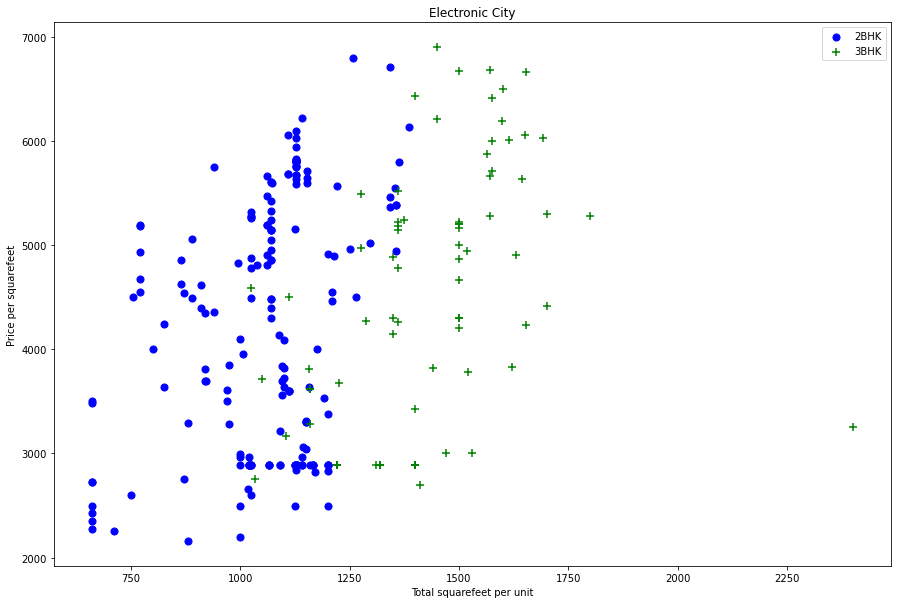

In [158]:
def scatter_plot(df,location):
    bhk2 = df[(df.location==location) & (df['BHK'] == 2)]
    bhk3 = df[(df.location==location) & (df['BHK'] == 3)]
    plt.scatter(bhk2['total_sqft'],bhk2['price_per_sqft'], color = "blue", label = "2BHK", s=50)
    plt.scatter(bhk3['total_sqft'],bhk3['price_per_sqft'],marker = "+", color = "green", label = "3BHK", s=50)
    plt.xlabel("Total squarefeet per unit")
    plt.ylabel("Price per squarefeet")
    plt.title(location)
    plt.legend()
    

scatter_plot(df7,"Electronic City")

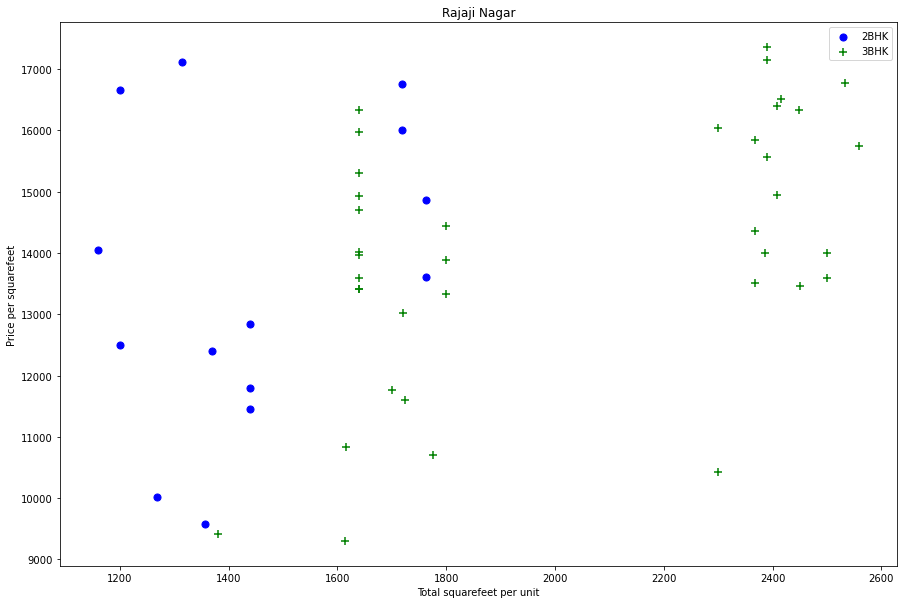

In [159]:
scatter_plot(df7,"Rajaji Nagar")

- **It's evident that the prices of 2BHK and 3BHK houses overlap, even when they are in the same location.**

**To refine our analysis, we will eliminate properties where, for the same location, the price of a 3BHK house is less than that of a 2BHK house with the same square footage area. Our approach involves creating a dictionary of statistics per BHK for the given location:**
 
 {
     '1' : {
             'mean': 4000,
             'std' : 2000,
             'count': 34
            },
            '2' : {
             'mean': 4300,
             'std' : 2300,
             'count': 22
            },
            
   }
   
- Now, we can proceed to remove 2BHK houses whose 'price_per_sqft' is less than the mean 'price_per_sqft' of 1BHK houses in the same location

In [160]:
def remove_bhk_outliers(df):
    remove_indices = np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('BHK'):
            bhk_stats[bhk] = {
                'mean' : np.mean(bhk_df["price_per_sqft"]),
                'std' : np.std(bhk_df["price_per_sqft"]),
                'count' : bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('BHK'):
                stats = bhk_stats.get(bhk-1)
                if stats and stats['count'] >5:
                    remove_indices = np.append(remove_indices, bhk_df[bhk_df["price_per_sqft"] < (stats['mean'])].index.values)
    return df.drop(remove_indices, axis = "index")

In [161]:
df8 = remove_bhk_outliers(df7)
df8.shape

(7329, 7)

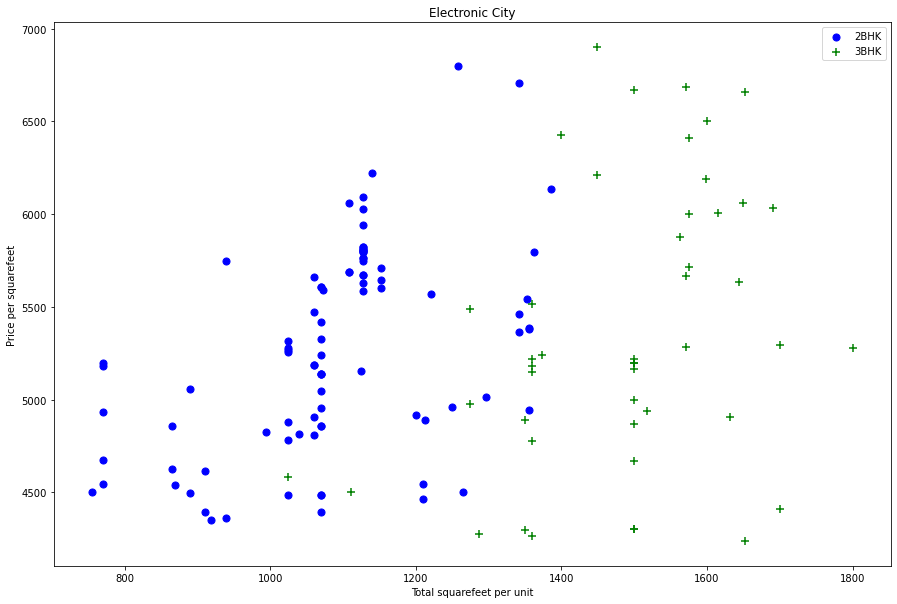

In [162]:
# Now, let's visualize the scatter plot for the same locations using the new dataframe.

scatter_plot(df8,"Electronic City")


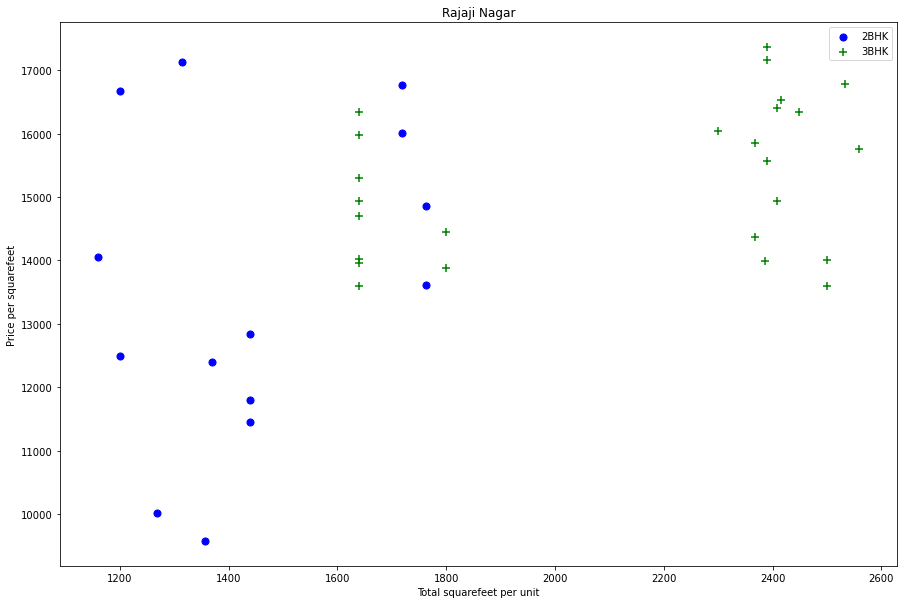

In [163]:
scatter_plot(df8,"Rajaji Nagar")

Text(0, 0.5, 'Count')

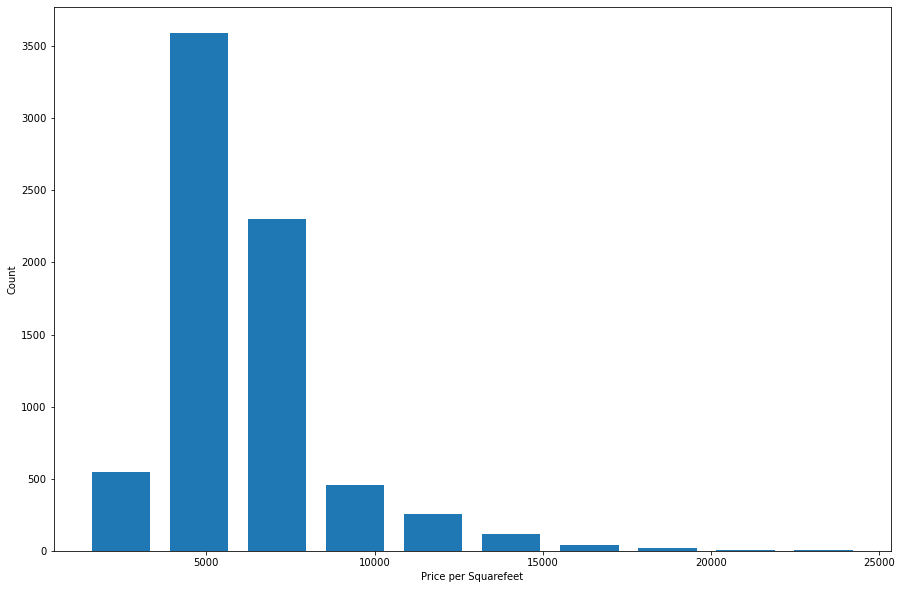

In [167]:
# Generating histograms for the 'price_per_sqft' column.

plt.hist(df8["price_per_sqft"], rwidth = 0.750)
plt.xlabel("Price per Squarefeet")
plt.ylabel("Count")


- Next, we'll examine the number of bathrooms per house in relation to the number of bedrooms (BHK). 
- Typically, the number of bathrooms is either the same as the number of bedrooms or sometimes one more (BHK + 1). 
- Any value beyond that is considered unlikely

In [179]:
k = df8.groupby(['BHK','bath'])['bath'].agg('count')
k

BHK  bath
1    1.0      486
     2.0       32
2    1.0       81
     2.0     3517
     3.0       38
     4.0        2
3    1.0        1
     2.0      632
     3.0     1637
     4.0      190
     5.0       20
     6.0        1
4    2.0       17
     3.0       82
     4.0      289
     5.0      109
     6.0       42
     7.0        1
     8.0        1
5    3.0        5
     4.0       16
     5.0       38
     6.0        9
     7.0        5
6    3.0        1
     4.0        4
     5.0        6
     6.0       27
     7.0        1
     8.0        3
     9.0        1
7    4.0        1
     6.0        1
     7.0        7
8    4.0        1
     5.0        2
     6.0        1
     7.0        2
     8.0        8
9    8.0        1
     9.0        4
10   9.0        1
     12.0       2
11   9.0        1
     12.0       1
13   13.0       1
16   16.0       1
Name: bath, dtype: int64

- Clearly, there are instances, like a 6BHK house with 9 baths, which is unusual
- We are going to seggregate the houses which has more than 10 baths

In [180]:
df8[df8['bath']>10]

,location,size,total_sqft,bath,price,BHK,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,4000.000000
8486,other,10 BHK,12000.0,12.0,525.0,10,4375.000000
8575,other,16 BHK,10000.0,16.0,550.0,16,5500.000000
9308,other,11 BHK,6000.0,12.0,150.0,11,2500.000000
9639,other,13 BHK,5425.0,13.0,275.0,13,5069.124424


Text(0, 0.5, 'Count')

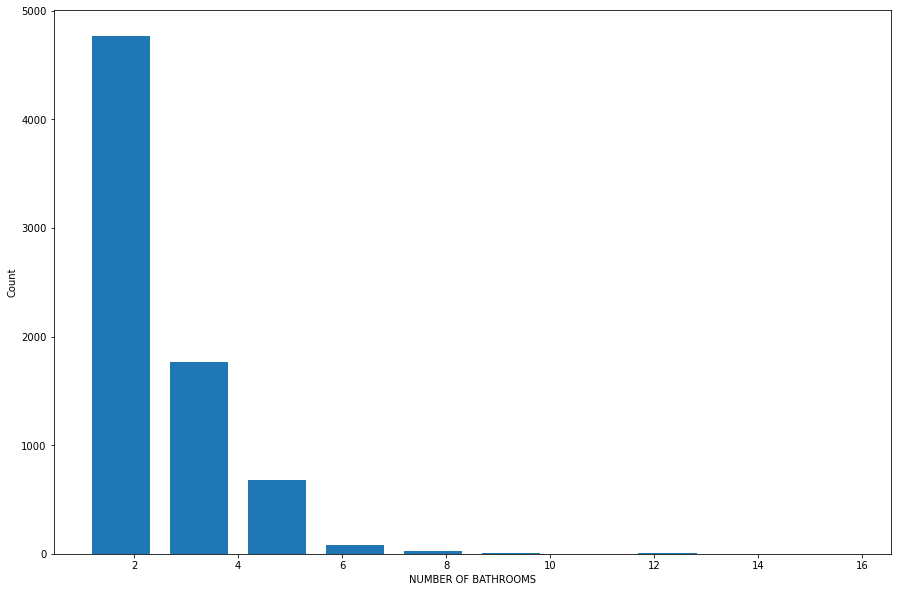

In [181]:
plt.hist(df8['bath'],rwidth =0.75)
plt.xlabel("NUMBER OF BATHROOMS")
plt.ylabel("Count")

In [183]:
#Identifying the Bathroom outliers and removing them

df8[(df8['bath'] > df8['BHK']+2)]

,location,size,total_sqft,bath,price,BHK,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,3252.032520
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,6428.571429
6711,Thanisandra,3 BHK,1806.0,6.0,116.0,3,6423.034330
8411,other,6 BHK,11338.0,9.0,1000.0,6,8819.897689


In [184]:
df9 = df8[(df8['bath'] < df8['BHK']+2)]
df9.shape

(7251, 7)

- Our data is nearly prepared for model building. 
- At this stage, it's essential to drop any unnecessary or redundantly engineered columns to enhance model accuracy. 
- Since we have the 'BHK' column, we can safely drop the 'size' column. Similarly, as we already have the 'price' column, we can remove the 'price_per_sqft' column

In [186]:
df10 = df9.drop(['price_per_sqft','size'], axis = "columns")
df10.head()

,location,total_sqft,bath,price,BHK
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


In [187]:
df10.shape

(7251, 5)

In [189]:
df10['location'].value_counts()

other                    1134
Whitefield                238
Sarjapur  Road            186
Electronic City           162
Raja Rajeshwari Nagar     140
                         ... 
Vishveshwarya Layout        4
Vishwapriya Layout          4
HAL 2nd Stage               4
2nd Stage Nagarbhavi        4
Marsur                      3
Name: location, Length: 242, dtype: int64

- Examining the 'location' column, we observe around 242 unique values. 
- It's important to address the impact of string values in the 'location' column on the model's efficiency before proceeding.
- To handle this, we are implementing **ONE HOT ENCODING**, generating dummy variables for each unique value in the 'location' column using pandas

In [192]:
dummies = pd.get_dummies(df10['location'])
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


- We are dropping the 'other' column as its presence can be inferred when all other area columns are '0'. 
- Also the "location" column as we have encoded.
- Additionally, we are merging the encoded dataframe with the original one

In [194]:
df11 = pd.concat([df10.drop("location", axis = 'columns'),dummies.drop("other",axis = 'columns')], axis = "columns")
df11.head()

,total_sqft,bath,price,BHK,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# DATA MODELLING

In [197]:
#Splitting the dataset into dependent and independent variables
X = df11.drop("price",axis = 'columns')
Y = df11['price']

print(X.shape)
print(Y.head())

(7251, 244)
0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64


In [203]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.20, random_state = 10)

- Linear regression is a widely used algorithm in machine learning when the relationship between the independent variable(s) and the dependent variable is assumed to be linear. It is employed in various scenarios, and here are some common use cases for linear regression:

**Predictive Modeling:**

- Example: Predicting house prices based on features such as square footage, number of bedrooms, and location.

**Sales Forecasting:**

- Example: Predicting sales figures based on factors like advertising spending, promotions, and historical sales data.

**Financial Analysis:**

- Example: Analyzing the impact of interest rates on stock prices or predicting future stock prices based on historical trends.

**Economics and Business:**

- Example: Studying the relationship between a country's GDP and factors like population size, investment, and exports.

**Healthcare:**

- Example: Predicting patient outcomes based on factors like age, blood pressure, and cholesterol levels.

**Marketing and Customer Behavior:**

- Example: Understanding how advertising expenditures influence product sales or predicting customer churn based on various factors.

**Quality Control:**

- Example: Predicting product quality based on manufacturing process parameters.
Resource Allocation:

- Example: Determining the impact of resource allocation on project completion times.

**Key Assumptions of Linear Regression:**

- Linearity: The relationship between the independent and dependent variables is assumed to be linear.
- Independence: Observations are assumed to be independent of each other.
- Homoscedasticity: Residuals (the differences between predicted and actual values) should have constant variance across all levels of the independent variables.
- Normality of Residuals: The residuals should be normally distributed.

**Advantages of Linear Regression:**

- Interpretability: The results are easily interpretable, making it suitable for explaining relationships between variables.

- Simplicity: Linear regression is computationally efficient and easy to implement.

- Baseline Model: It serves as a baseline model for more complex algorithms.

In [204]:
from sklearn.linear_model import LinearRegression
lr_classification = LinearRegression()
lr_classification.fit(X_train,Y_train)
lr_classification.score(X_test,Y_test)

0.845227769787429

- Randomizing sample split using ShuffleSplit


In [209]:
from sklearn.model_selection import ShuffleSplit, cross_val_score

cv = ShuffleSplit(n_splits = 5, test_size =0.2, random_state = 19)

cross_val_score(LinearRegression(), X,Y, cv=cv)

array([0.81044441, 0.81940886, 0.87541413, 0.84236408, 0.84929055])

- We are utilizing GridSearchCV to identify the best regressor model for the given dataset

In [215]:
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_my_best_model(X,Y):
    algorithm = {
        'linear regression': {
            'model': LinearRegression(),
            'params': {
                'normalize': [True,False]
            }
        },
        'lasso': {
            'model': Lasso(),
            'params':{
                'alpha': [1,2],
                'selection': ['random','cyclic']
            }
        },
        'decision tree regressor': {
            'model': DecisionTreeRegressor(),
            'params': {
                'criterion': ['mse','friedmanmse'],
                'splitter': ['best','random']
            }
        }
    }
    score = []
    cv = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 10)
    for algo_name, config in algorithm.items():
        gs = GridSearchCV(config['model'], config['params'], cv=cv, return_train_score = False)
        gs.fit(X,Y)
        score.append({
            'model' : algo_name,
            'best_score' : gs.best_score_,
            'best_params' : gs.best_params_
        })
    
    return pd.DataFrame(score, columns = ['model','best_score','best_params'])
    

In [216]:
find_my_best_model(X,Y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model =

,model,best_score,best_params
0,linear regression,0.847375,{'normalize': False}
1,lasso,0.712994,"{'alpha': 1, 'selection': 'cyclic'}"
2,decision tree regressor,0.656198,"{'criterion': 'mse', 'splitter': 'random'}"


- Writing a function to predict the price based on location, size, bath, and BHK

In [218]:
def predict_price(location,sqft,bath,BHK):
    loc_index = np.where(X.columns == location)[0][0]
    
    x = np.zeros(len(X.columns))
    x[0] = sqft
    x[1] = bath
    x[2] = BHK
    
    if loc_index >= 0:
       x[loc_index] = 1
    return lr_classification.predict([x])[0]

In [219]:
df11.columns

Index(['total_sqft', 'bath', 'price', 'BHK', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=245)

In [227]:
predict_price('Whitefield',1800,2,3)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


115.11780947305611

In [222]:
predict_price('Vishwapriya Layout',1000,1,1)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


42.054697343183136

In [226]:
predict_price('Vishwapriya Layout',1500,2,3)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


83.29565372141862

# PYTHON FLASK SERVER

- Exporting the data model as a pickle file. 
- Additionally, since we are using the column names as parameters in our predicting function
- we are also exporting the list of column names as a .json file

In [229]:
import pickle
with open("Bengaluru_house_data_model.pickle",'wb') as bhd:
    pickle.dump(lr_classification,bhd)    

In [230]:
import json
columns = {
    'data columns': [col.lower() for col in X.columns]
}
with open("Bengaluru_house_data_model_column.json",'w') as f:
    f.write(json.dumps(columns))